In [41]:
import cv2
import numpy as np
from tensorflow import image as tfimg

In [42]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
#     xy_window = (50, 50)
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[2]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[1]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

In [43]:
def search_windows(prediction_method, img, windows, xy_window=(64, 64)):
    on_windows = []
    for window in windows:
#         print(img.shape)
#         crop_img = img[0][window[0][1]:window[1][1], window[0][0]:window[1][0]]
#         print(crop_img.shape)
        crop_img = cv2.resize(img[0][window[0][1]:window[1][1], window[0][0]:window[1][0]], (224, 224))
#         print(img.size)
        crop_img = np.expand_dims(crop_img, axis=0)
        prediction = prediction_method(crop_img)
#         print(prediction)
        if prediction:
            on_windows.append(window)

    return on_windows

# Testing With ImageNet Weights

In [44]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image

def dog_detector(img):
    preprocessed_img = preprocess_input(img)
    prediction = np.argmax(ResNet50_model.predict_on_batch(preprocessed_img))
    return ((prediction <= 268) & (prediction >= 151))

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
#     img = image.load_img(img_path, target_size=(224, 224))    
    img = image.load_img(img_path)
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

In [45]:
from keras.applications.resnet50 import ResNet50

ResNet50_model = ResNet50(weights='imagenet')

In [46]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


In [47]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg



In [48]:
test_img = path_to_tensor('dog-walk.jpg')
# print(test_img.shape)
windows = slide_window(test_img)
# print(len(windows))
# print(windows)
# print(windows[0])
on_windows = search_windows(dog_detector, test_img, windows)
# out_img = cv2.cvtColor(test_img[0], cv2.COLOR_BGR2RGB)
# out_img = image.load_img('dog-walk.jpg').convert('RGB')
# out_img = image.img_to_array(out_img)
# drawn_img = draw_boxes(out_img.copy(), on_windows)
# plt.imshow(out_img)
# plt.show()
# plt.imshow(drawn_img)
# plt.show()
# print(on_windows)

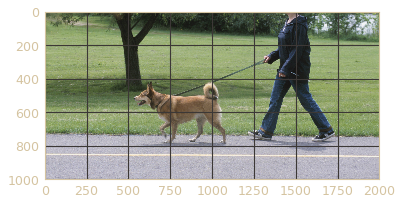

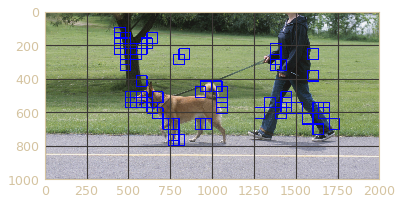

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# out_img = image.load_img('dog-walk.jpg').convert('RGB')
# out_img = image.img_to_array(out_img)
out_img = mpimg.imread('dog-walk.jpg')
drawn_img = draw_boxes(out_img.copy(), on_windows)
plt.imshow(out_img)
plt.show()
plt.imshow(drawn_img)
plt.show()
# print(on_windows)